# Particle in an box with infinite-potential walls


The Jupyter notebook is provided for the introductory Quantum Physics course at the University of York.

```{admonition} Acknowledgement
These Jupyter notebooks are based on the excellent work by the following authors:

* [Vinícius Wilian D. Cruzeiro](https://scholar.google.com/citations?user=iAK04WMAAAAJ). E-mail: vwcruzeiro@ufl.edu
* Xiang Gao. E-mail: qasdfgtyuiop@ufl.edu
* [Valeria D. Kleiman](http://kleiman.chem.ufl.edu/). E-mail: kleiman@ufl.edu
Department of Chemistry, Physical Chemistry Division, University of Florida**

Cite: J. Chem. Educ. 2019, 96, 8, 1663–1670, Publication Date:July 11, 2019. https://doi.org/10.1021/acs.jchemed.9b00195
```

In [1]:
###############################################################################################
#
#  The cell contains all of the libraries used in the notebook, either run all cells or
#  execute the cells in order starting with this. 
#
#  In google colab run all is ctrl+F8 or select "run all" from the runtime menu above
#
###############################################################################################

import matplotlib as mpl # matplotlib library for plotting and visualization
import matplotlib.pylab as plt # matplotlib library for plotting and visualization
import matplotlib.patches as mpatches # matplotlib for adding patches to the legend
import numpy as np #numpy library for numerical manipulation, especially suited for data arrays
import warnings
warnings.filterwarnings('ignore')

#widget modules, to allow interaction with plots
from ipywidgets import interactive
import ipywidgets as widgets
#IPython for inteactive outputs from cells
from IPython.display import display, HTML, Image, Markdown

#To animate the 3D plots and produce movies
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D

#Use to test the system, different response from some code
#depending on whether the notebook is being compiled into a webpage, 
#run in jupyter or in google colab.
import sys
import psutil

IN_COLAB = 'google.colab' in sys.modules
PARENT_PROC = psutil.Process().parent().cmdline()[-1]

#set variable to identify the environment for execution.
if 'jupyter-lab' in PARENT_PROC:
    interactive_env = True
elif 'jupyter-notebook' in PARENT_PROC:
    interactive_env = True
elif IN_COLAB:
    interactive_env = True
else:
    interactive_env = False

## Particle in a one dimensional box

In this section we will look at the simplest problem where a particle is confined to a single region. Below is a schematic representation of the potential known as the infinite square well. We will only consider motion in one dimension but next year you will see how this problem can be extended to two and three dimensions. In this case a particle is restricted to moving only in the $x$ direction. The potential is zero in the region $0\le x\le L$ but infinite in the regions $x<0$ and $x>L$. Recall that the force, $F$, acting on a particle when it encounters a change in the potential, $V$, is given by

$$
F=-\frac{dV}{dx}
$$

At $x=0$ and at $x=L$ the potential goes from $V=0$ to $V=\infty$. If this was a positron, for example, this would be equivelant to the electostatic potential changing from $V=0$ Volts to $V=\infty$ Volts. The particle encountering this change will be subjected to a force that is infinitaly large, hence the particle will reverese direction and return along the path along which it travelled. 

We can say that the infinite square well restricts the particle to moving *only* in the region $0\le x\le L$. In other words it is not possible for the particle to have a position greater than $L$ or less than $0$.

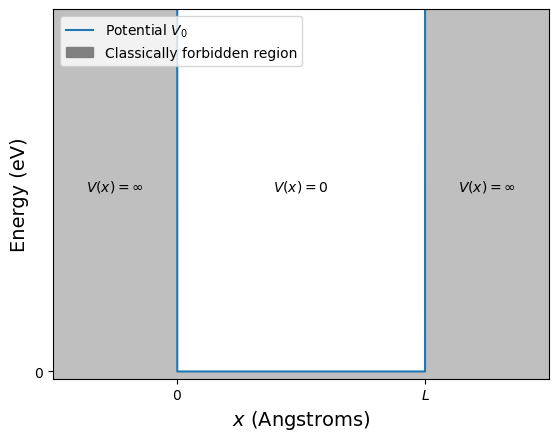

In [2]:
def potential(x, Vo, L):
    Vx=np.zeros(len(x))
    for i in range(len(x)):
        if x[i]<=0 or x[i]>=L:
            Vx[i]=Vo
        

    return Vx

L=10
Vo=5
infty = Vo*10

fig, ax=plt.subplots()

#create and plot the potential
x = np.linspace(-0.5*L, 1.5*L, 1000)
Vx = potential(x, infty, L)
ax.plot(x,Vx, label='Potential $V_0$')

ax.set_ylim(-.1,Vo)
ax.set_xlim(-0.5*L, 1.5*L)
ax.set_xlabel(r'$x$ (Angstroms)', fontsize=14)
ax.set_ylabel(r'Energy (eV)', fontsize=14);

#label the three regions of the potential
ax.annotate('$V(x)=\infty$',xy=(-0.25*L,Vo/2), ha='center')
ax.annotate('$V(x)=0$',xy=(L/2,Vo/2), ha='center')
#ax.annotate('$-\dfrac{\hbar^2}{2m} \dfrac{d^2\psi}{dx^2}=E\psi$',xy=(L/2,Vo/2), ha='center')
ax.annotate('$V(x)=\infty$',xy=(1.25*L,Vo/2), ha='center')

#generic plot, label interms of width L and depth Vo
ax.set_yticks([0])
ax.set_yticklabels(['0'])
ax.set_xticks([0, L])
ax.set_xticklabels(['$0$','$L$'])

#highlight the classically forbidden region in gray
ax.bar(-0.25*L, infty, width=L/2, color='gray', alpha=0.5)
ax.bar(1.25*L, infty, width=L/2, color='gray', alpha=0.5)
ax.bar(L/2, -0.1, width=2*L, color='gray', alpha=0.5)

#indicate potential is infinite with arrow
#ax.arrow(0, 0, 0, Vo-0.4, width = 0.05, head_width=0.3)#, ec='blue')
#ax.arrow(L, 0, 0, Vo-0.4, width = 0.05, head_width=0.3)#, color='blue')

patch = mpatches.Patch(color='gray', label='Classically forbidden region')
handles, labels = ax.get_legend_handles_labels()
handles.append(patch)
ax.legend(handles=handles, loc=2);

plt.show()


```{figure} ../images/blankspaceholder.png
---
alt: A schematic of the infinite potential well, a blue line shows the potential (y-axis) as a function of position (x-axis). Regions where the particles energy is less than the potential are where particles are classically forbidden and are shaded gray and allowed regions are unshaded.

height: 5px
align: center
name: finite_potential_well_fig
---
The infinite potential well of width $L$, note the potential is $\infty$ is the region $x<0$ and $x>L$, and zero in the region $0\le x\le L$. The shaded gray area shows areas where a particle that has less energy than the potential would be classically forbidden. The unshaded areas are where a classical particle will be free to move.
```

Our aim now is to find the energies a particle confined into this potential is allowed to have. To do this we will need to employ the one dimension time independent Schrödinger (1D TISE) which is given by

$$
\frac{-\hbar^2}{2m}\frac{\partial^2\psi(x)}{\partial{x}^2}+V(x)\psi(x) =E\psi(x) 
$$


In the region $0\le x\le L$, the potential $V(x)$ is equal to zero, therefore the Schrödinger equation for this system is given by

$$
\frac{-\hbar^2}{2m}\frac{\partial^2\psi(x)}{\partial{x}^2} =E\psi(x)
$$



## Choosing the appropriate wave function

What is the wavefunction for our particle trapped in the box? Well, it will propagate both towards the potential at $L$ and the back towards the potential at $0$. The wave function must therefor have both a positive and a negative momentum to fully describe the behaviour. To achieve this we need two exponential terms, one with a $+k$ and one with a $-k$ in the argument. 

$$
\psi(x)=A_1e^{ikx}+B_1e^{-ikx}
$$

The amplitudes $A_1$ and $B_1$ can be complex and it is most convenient to rewrite this using Euler as a sum of sine and cosine. This gives us the most general form of the wave function suitable for the infinite square well.

$$\psi(x)=A\sin(kx)+B\cos(kx)$$

We will choose this form for particle confined between two potential barriers because, and only because, it makes the maths easier. There is no other reason and you can use the exponential form to solve the problem, but the algebra is often more complex.

## Boundary conditions

Since the potential is infinity outside the box, the wave function must obey the following ***Boundary Conditions***:

$$
\psi(0)=0 \text{  and  } \psi(L)=0
$$

where *L* is the length of the box.

**Why?** Recall that when we introduced the wavefunction we defined four properties. One of which was that the wavefunction must be continuous (single valued) everywhere. It is impossible for the particle to have an $x$ coordinate for $x<0$ and $x>L$ so the wavefunction must be $\psi(x)=0$. When $0 \le x \le L$ the wavefunction will have some value, as this is the region in which we can observe some properties of the particle. In order to make the wavefunction continuous we the function either side of the boundary the same value.

There are two boundary conditions and we must apply them both. First the boundary condition at $x=0$, we find:

$$
A\sin(k0)+B\cos(k0)=0
$$

and because $\cos(k0)=1$,

$$
B=0
$$

This tells us that the cosine term does not contribute in this case (note it will be useful in other situations and whether it is non-zero or zero depends on the choice of boundary conditions).

Now we repeat for the boundary at $x=L$ and and employing the fact that $B=0$ to find

$$
A\sin(kL)=0
$$

we can make the $\sin$ term zero we must make suitable choices for $kL$, 

$$
\therefore kL=n\pi
$$

where $n=1,2,3,4,\text{...},\infty$ is an integer.

Notice that we could also have chosen $A=0$ and satisfied the boundary conditions. You might be asking yourself why we didn't make that choice, which would of course appear to make the problem easier. If we had chosen $A=0$ then along with $B=0$ the wavefunction in the region $0\le x\le L$ would also be zero. Because $|\psi(x)|^2$ is a probability density this is equivelant to saying there is no particle in the potential well. If $A\ne 0$ how do we find the value, the probability of finding the particle in the region $0\le x\le L$ must be 1 so setting this probability to 1 will provide us with the value of $A$ for the given system.

```{margin} What is a system?
Note you will see the word system throughout your study of physics. It is a generic term that is used to refer to the particular set of physical parameters that define the object you are studying.
```

## Normalising the wave function

We now obtain the expression for $A$ by normalising the wave function.

$$
A^2\int_0^L \sin^2(kx)dx=1
$$

After normalising the wavefunction and solving at the boundary conditions, the eigenfunctions obtained are given by:

$$
\psi_n(x) = \sqrt{\frac{2}{L}} \sin\left(\frac{n\pi}{L}x\right)
$$


In [6]:
#############################################
# Use sympy to define a wavefunction
#############################################

from sympy import *
import sympy as sym

sym.init_printing(use_unicode=False, wrap_line=True, use_latex="mathjax")
x, n, L = sym.symbols('x n L', positive=True)
psi_symb = sym.sqrt(2/L)*sym.sin(n*sym.pi*x/L) ## this is the symbolic definition
psi = sym.lambdify([x, n, L], psi_symb, "numpy") ## this is the function we can evaluate

#print(latex(sym.sqrt(2)))

#prob density function
psi_pdf_symb = sym.integrate(psi_symb**2,x)                  ## this is the symbolic definition
psi_pdf = sym.lambdify([x, n, L], psi_pdf_symb, "numpy")     ## this is the symbolic definition



## may use the following later to render the equations
## still need to solve how to reference and display \psi consistently
#str1 = '$$ \psi_n (x)='+latex(psi_symb)+'$$'
#print(str1)
#(Markdown(str1))
#x = np.linspace(0,10,1000)
#plot(psi_symb, (x,1,10))
#psi_pdf = sym.lambdify([x, n, L], psi_pdf_symb, "numpy")
#psi_pdf = sym.lambdify([x, n, L], psi_pdf_symb, "numpy")


```{margin} $n$ the principle quantum number
$n$ is called the principle quantum number, the energy of a particular state is related to the principle quatum number. Later you will see other properties such as spin and angular momentum have associated quantum numbers.  
```

where  $n=1, 2, ..., \infty $. Note we call this an **eigenfunction**, this is the *characteristic function* that describes this particular system and is just a naming convention derived from the underlying mathematical theory. It is important that you understand what this equation tells you and to be able to recall the name. However, you will hear the term wavefunction and eigenfunction being employed interchangeably.  

It is important to emphasize that the quantization (*n* being only positive integers) is a consequence of the boundary conditions. This is a generally applicable idea, any time a particle is confined to a particular region the energy of the particle becomes quantised (i.e. in stead of it being continuous is take on a set of discrete values).

The Wavefunction, $\psi_n(x)$ and the Probability Density, $|\psi_n(x)|^2$ are plotted in {numref}`figure {number} <infinite_square_well_wavefunction_fig>`. The values of $n$ and $L$ can be adjusted in the interative version. 

As with all of these notes there is an live version of this notebook on Google colab that you can interact with and change the variables. The questions above can be answered by following the link below, running the notebook and then playing with the variable and interpreting the outputted functions. 

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1VHAR18Ar-MXghfeVlwnjOjg_At1YKjqx)

In [7]:
from matplotlib.patches import Polygon
import matplotlib.patches as mpatches

# Generating the wavefunction graph
def update_plot(n,L,ab):
    x = np.linspace(0, L, 900)
    fig, ax = plt.subplots(1,2, figsize=(11,4), layout="constrained")
    lim1=np.sqrt(2.0/L) # Maximum value of the wavefunction
    ax[0].axis([0.0,L,-1.6*lim1,1.6*lim1]) # Defining the limits to be plot in the graph
    ax[0].plot(x, psi(x,n,L), linestyle='-', label="Wavefunction", color="red") # Plotting the wavefunction
    ax[0].hlines(0.0, 0.0, L, linewidth=1.8, linestyle='--', color="black") # Adding a horizontal line at 0
    # Now we define labels, legend, etc
    ax[0].legend(loc=2);
    ax[0].set_xlabel(r'$x$')
    ax[0].set_ylabel(r'$\psi_n(x)$')

    ax[1].axis([0.0,L,0.0,lim1*lim1*1.3])
    ax[1].plot(x, psi(x,n,L)*psi(x,n,L), label="Probability Density Function")
    ax[1].set_xlabel(r'$x$')
    ax[1].set_ylabel(r'$|\psi_n|^2(x)$')

    # Make the shaded region to show P(x)dx
    a=ab[0]
    if(ab[1] > L):
        b=L
    else:
        b=ab[1]
    ix = np.linspace(a, b, 1000)
    iy = psi(ix,n,L)*psi(ix,n,L)
    prob = psi_pdf(b,n,L)-psi_pdf(a,n,L)
    #prob = sym.integrate(psi_pdf,(x,0,L))
    verts = [(a, 0), *zip(ix, iy), (b, 0)]
    poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
    ax[1].add_patch(poly)

    str1=r'$\int_{'+str(a)+'}^{'+str(b)+'}P(x)dx=$'+str("%.2f" % prob)
    #ax[1].text(L*0.05, lim1*lim1*1.1*0.7, str1, bbox={'facecolor': 'gray', 'alpha': 0.2, 'pad': 10})
    patch = mpatches.Patch(color='gray', label=str1)
    handles, labels = ax[1].get_legend_handles_labels()
    handles.append(patch)
    ax[1].legend(handles=handles, loc=2);
   
    # Show the plots on the screen once the code reaches this point
    plt.show()


Llabel = r"L"
nlabel = r"n"
interactive_plot = widgets.interactive(update_plot,n=widgets.IntSlider(min=1, max=10, value=2, description=nlabel,orientation='horizontal'), 
                               L=widgets.FloatSlider(min=5, max=20, step=0.5, value=10, description=Llabel,orientation='horizontal'), 
                               ab=widgets.FloatRangeSlider(value=[5, 7.5],min=0,max=20,step=0.1,description='P(limits):', readout_format='.1f'))

#output = interactive_plot.children[-1]
display(interactive_plot)

interactive(children=(IntSlider(value=2, description='n', max=10, min=1), FloatSlider(value=10.0, description=…

```{figure} ../images/blankspaceholder.png
---
alt: The wave function (left) probability density (right) for the n=2 state in the infinite square well.  
height: 5px
align: center
name: infinite_square_well_wavefunction_fig
---
The wave function (left) probability density (right) for the $n=2$ state in the infinite square well. The probability of finding the particle within the shaded area is given in the legend.
```

Here are a few questions to think about before we move on:
   - **Q1:** Can you infer from the graphical representations of $\psi_n(x)$ or $|\psi_n(x)|^2$ the principle quantum number $n$?
   - **Q2:** Does it matter that $\psi_n(x)$ has negative values?  
   - **Q3:** How is $|\psi_n(x)|^2$ related to $\psi_n(x)$
   - **Q4:** What variables and parameters does $\psi_n(x)$ depend on?
   - **Q5:** What is represented by the grayed out area?

```{dropdown} Answers

- **A1:** Yes, as with standing waves the simplest state is $n=1$ and has nodes at the boundaries, the next is $n=2$ and has nodes at the boundaries and one in between. Hence, a visual inspection of the number of nodes tells us the principle quantum number. 
    
- **A2 & A3:** No, the function $\psi_n(x)$ is the wavefunction and is not directly observable. As with electromagnetic waves the observed quantity is related to the square of the wave in this case $|\psi_n(x)|^2$ which is never negative.
    
- **A4**: The properties of $\psi_n(x)$ depend only on $n$ and $L$ as $n$ gets larger the wavelength gets shorter. We can infer from this the particle has a higher kinetic energy. Recall $p=h / \lambda$.
    
- **A5:** The gray area is the area under the probability density function. This represents the probability of the particle being within the upper and lower boundary of the the grayed out area. 
```

It is perhaps easier to see the answer to **Q4** by looking at how the wavefunction and probability density for a given state n change as the length $L$ changes 

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1VHAR18Ar-MXghfeVlwnjOjg_At1YKjqx)

In [8]:
#@title Plotting the wavefunction { vertical-output: true, form-width: "60%", display-mode: "form" }

def compare_diff_widths(n,L1,L2):
    # Generating the wavefunction and probability density graphs
    fig, ax = plt.subplots(1,2, figsize=(12,4), layout="constrained")
    #ax.spines['right'].set_color('none')
    #ax.xaxis.tick_bottom()
    #ax.spines['left'].set_color('none')
    #ax.axes.get_yaxis().set_visible(False)
    #ax.spines['top'].set_color('none')
    minL = min(L1,L2)
    maxL = max(L1,L2)
    X1 = np.linspace(0.0, L1, 900,endpoint=True)
    X2 = np.linspace(0.0, L2, 900,endpoint=True)
    ax[0].set_xlabel(r'$X$ (Angstroms)')
    ax[0].set_ylabel("$\psi_n$")
    str1=r"$L1 = "+str(L1)+r"$ A"
    str2=r"$L2 = "+str(L2)+r"$ A"
    ax[0].plot(X1,psi(X1,n,L1), color="red", label=str1)
    ax[0].plot(X2,psi(X2,n,L2), color="blue", label=str2)
    ax[0].legend(loc=1)
    ax[0].axis([-1,21,-1.1*np.sqrt(2/minL), 1.1*np.sqrt(2/minL)])

    ax[1].set_xlabel(r'$X$ (Angstroms)')
    ax[1].set_ylabel("$|\psi_n|^2$")
    ax[1].plot(X1,psi(X1,n,L1)*psi(X1,n,L1), color="red")
    ax[1].plot(X2,psi(X2,n,L2)*psi(X2,n,L2), color="blue")
    ax[1].axis([-1,21, 0, 2.1/minL])

    str2="$V = +\infty$"

    ax[0].vlines(0.0,-1.1*np.sqrt(2/minL), 1.1*np.sqrt(2/minL), linewidth=3, color="red")
    ax[0].vlines(L1,-1.1*np.sqrt(2/minL), 1.1*np.sqrt(2/minL), linewidth=3, color="red")    
    ax[0].vlines(0.0,-1.1*np.sqrt(2/minL), 1.1*np.sqrt(2/minL), linewidth=2, color="blue")
    ax[0].vlines(L2,-1.1*np.sqrt(2/minL), 1.1*np.sqrt(2/minL), linewidth=2, color="blue")

    ax[1].vlines(0.0, 0, 2.1/minL, linewidth=3, color="red")
    ax[1].vlines(L1, 0, 2.1/minL, linewidth=3, color="red")    
    ax[1].vlines(0.0, 0, 2.1/minL, linewidth=2, color="blue")
    ax[1].vlines(L2, 0, 2.1/minL, linewidth=2, color="blue")
    ax[0].hlines(0.0, 0.0, maxL, linewidth=1.8, linestyle='--', color="black")
    #ax.hlines(np.sqrt(4.0/L), 0.0, L, linewidth=1.8, linestyle='--', color="black")
    #plt.title('Wavefunction and Probability Density', fontsize=30)
    #str3=r"$n = "+str(n)+r"$"
    #ax.text(1.1*L,np.sqrt(4.0/L), r"$n = "+str(n)+r"$", fontsize=25, color="black")
    #plt.legend(bbox_to_anchor=(0.73, 0.95), loc=2, borderaxespad=0.)

    # Show the plots on the screen once the code reaches this point
    plt.show()
    
L1label = r"L1"
L2label = r"L2"
nlabel = r"n"
interactive_plot = widgets.interactive(compare_diff_widths,n=widgets.IntSlider(min=1, max=10, value=2, description=nlabel,orientation='horizontal'), L1=widgets.FloatSlider(min=5, max=20, step=0.5, value=10, description=L1label,orientation='horizontal'), L2=widgets.FloatSlider(min=5, max=20, step=0.5, value=15, description=L2label,orientation='horizontal'))
output = interactive_plot.children[-1]
display(interactive_plot)

interactive(children=(IntSlider(value=2, description='n', max=10, min=1), FloatSlider(value=10.0, description=…

```{figure} ../images/blankspaceholder.png
---
alt: Wavefunctions and probability density functions for two different width infinite square wells. (left plot) shows thes wavefunctions the smaller length well has a shorter wavelength and larger amplitude compared to the longer length well. (right plot) the right shows probabilty density functions, the shorter has a larger amplitude than the longer well.   
height: 5px
align: center
name: length_comparision_infinite_square_well_fig
---
The wave function (left) probability density (right) for the $n=2$ state in the infinite square well of two different lengths. As the length gets longer as the well gets longer. The maximum value of the probability density function reduces because the area under the function must always be $1$. The probability of finding the electron for $x<1$ Angstrom is less in the 15 Angstrom well than the 10 Angstrom well. However, the probability of finding the particle within 1 Angstroms of $x=5$ Angstroms is greater in the 15 Angstrom well than the 10 Angstrom well. 
```

## Energy eigen functions and energy eigen values

Now we will complete the aim of this section by calculating the allowed energies of the particle confined to a one dimensional box. Recall that by solving at the boundary conditions we found an expression for the wave function with quantized wave number $k$

$$
\psi_n(x)=\sqrt{\frac{2}{L}}\sin\left(\frac{n\pi x}{L}\right)
$$

These are the energy eigenfunctions of the system, there is one for each value of n. 

The values of $E$ that allow the above to be a solution to the Schrodinger equation are called eigenvalues. In this case the energy eigenvalues. To find the energy eigenvalues $E_n$ we must solve the TISE, when the potential is zero this is given by:

$$\frac{-\hbar^2}{2m}\frac{d^2}{dx^2}\psi(x)=E\psi(x)$$

First we determine the second derivative of the wavefunction:

$$\frac{d^2\psi}{dx^2}=-k^2\sqrt{\frac{2}{L}}\sin(kx)$$

Substituting this into the TISE gives:

$$\frac{\hbar^2}{2m}k^2\sqrt{\frac{2}{L}}\sin(kx)=E\sqrt{\frac{2}{L}}\sin(kx)$$

Making $E$ the subject and substituting in the expression for the quantised values of $k$, the energy eigenvalues are:

$$E_n=\left(\frac{n\pi}{L}\right)^2\frac{\hbar^2}{2m}$$


We can also look at the **allowed values of energy**, given by:

$$
E_n = \frac{n^2 h^2}{8mL^2}
$$  

where *m* is the mass of the particle. Now let's plot the energy levels for the infinite square well. 

In [9]:
#############################################
# Use sympy to define a wavefunction
#############################################

h=6.62607e-34    #planck's constant in joules
me=9.1093837e-31  # mass of an electron in kg

m = sym.symbols('m', positive=True)
En_symb = n**2*h**2/(8*m*(L*1e-10)**2*1.6e-19) ## this is the symbolic definition, energy in eV
En = sym.lambdify([n, L, m], En_symb, "numpy") ## this is the function we can evaluate

**Note:** Did you notice that $\psi_n(x)$ doesn't depend on the mass of the particle? How does this get introduced into the energy eigen values? This occurs when the Schrodinger equation is applied to the energy eigen functions. This is an operator, the Hamiltonian, and returns in this case the kinetic energy of the particle. This does depend on mass of the particle. 

In contrast to the solution in the free particle system, for a particle confined within the box, not every energy value is allowed. We see that quantization is a direct consequence of the boundary condition. In other words: confinement leads to quantization.

Let's now analyse how the **Energy Levels** $E_n$ for an electron change as a function of the **size of the box**.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1VHAR18Ar-MXghfeVlwnjOjg_At1YKjqx)

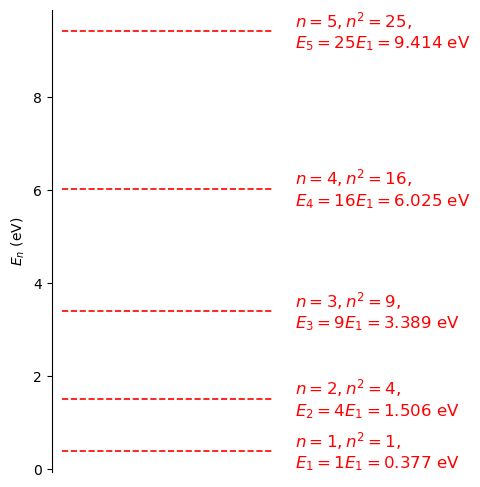

In [39]:
def infinite_square_well_En(L1):
    
    #determine the plot parameters for given n, L and m.  
    nmax1 = 0
    ymax = 10
    x1 = np.linspace(0,L1,1000)
   
    while (En(nmax1,L1,me)) < ymax:
        nmax1 +=1  
        
    # Create the graph
    fig, ax = plt.subplots(figsize=(3,6))
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['top'].set_color('none')
    #ax.spines['left'].set_color('none')
    ax.axes.get_xaxis().set_visible(False)
    #ax.axes.get_yaxis().set_visible(False)
    #ax.axis([-5,20,0,5.5])
    ax.set_ylabel(r'$E_n$ (eV)')
    ax.set_xlabel(r'$x$ (Angstroms)')

    #plot for each energy level below the allowed maximum
    #plot the wavefunction at each energy level
    for n in range(1,nmax1):
        str1='$n = '+str(n)+',n^2 = '+str(n**2)+'$, \n$E_{'+str(n)+'} = '+str(n**2)+'E_1 = %.3f$ eV'%(En(n,L1,me))
        ax.text(L1+1, En(n,L1,me), str1, fontsize=12, color="red", va='center')
        ax.hlines(En(n,L1,me), 0, L1, linewidth=1.2, linestyle='--', color="red")
   
    #label at the top to show the width
    #str1=r"$L_1 = "+str("%.0f" % L1)+r"$ A"
    #ax.text(-L1/2-1,ymax, str1, fontsize=18, color="red", ha='center', va='center')
    
    #nice box for the potential well
    #boxwidth = 0.5
    #boxheight = 0.1
    #ax.bar(0-boxwidth/2, ymax, width=boxwidth, color='gray')
    #ax.bar(L1+boxwidth/2, ymax, width=boxwidth, color='gray')
    #ax.bar(L1/2, boxheight, width=L1, color='gray')

    # Show the plots on the screen once the code reaches this point
    plt.show()
    
infinite_square_well_En(10)

```{figure} ../images/blankspaceholder.png
---
alt: A figure showing the allowed states with energies less than 10 eV in an infinite square well. The dashed lines show the energy levels at intervals of E-one times n squared.
height: 5px
align: center
name: en_infinite__squarewell_fig
---
An energy level diagram showing the allowed energy eigen states (dashed lines) and values in eV (right of the diagram). The values where calculated for an electron in an infinite square well of length 10 Angstroms. Compare the allowed energies and note how they are related to the ground state ($n=1$) and the principle quantum number ($n$). The energies are plotted to a maximum of 10 eV so that the diagram does not become too congested, note higher energies are allowed.
```



A couple of questions to consider regarding {numref}`figure {number}<en_infinite__squarewell_fig>`

 - **Q1:** Is is possible to have a particle in the infinite square well with energy zero eV?
 - **Q2:** Do particles in a state with a given $n$ have a definite momentum?
 
```{dropdown} Can a particle have zero eV energy in the infinte square well?

 - **A1:** No, this is not possible. If a particle had zero energy then it would also have zero momentum, i.e. the uncertainty on the momentum is zero. However, the position is known to be within the well. This is inconsistent with the Heisenberg uncertainty principle $\delta p_x \delta x \ge \hbar/2$. As we have discussed before, as the uncertainty in $p$ goes to zero the uncertainty in $x$ will go to infinity. This is not possible in this case.
 
 - **A2:** Again, no. The particles can have either $+p$ or $-p$ momentum. This is of course consistent with the previous answer. If we are able to measure the momentum of a particle in this infinite square well half of the results would yield $+p$ momentum and half $-p$ momentum. There is an uncertainty in the results we would obtain which leads to an uncertainty in the position.  

```

Now let us consider how changing the width of the well affects the energies of the states. To do this we will combine the plotting of the energy levels and wavefunction into one figure. 

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1VHAR18Ar-MXghfeVlwnjOjg_At1YKjqx)

In [21]:
def compare_psi_diff_widths_energy(L2):
    
    #determine the plot parameters for given n, L and m.  
    nmax1 = 0
    nmax2 = 0
    ymax = 5.5
    L1 = 10
    x1 = np.linspace(0,L1,1000)
    x2 = np.linspace(0,L2,1000)
   
    while (En(nmax1,L1,me)) < ymax:
        nmax1 +=1
    while (En(nmax2,L2,me)) < ymax:
        nmax2 +=1    
        
    # Create the graph
    fig, ax = plt.subplots(figsize=(12,8))
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.axis([-2*10,2*15,0,5.5])
    ax.set_ylabel(r'$E_n$ (eV)')

    #plot for each energy level below the allowed maximum
    #plot the wavefunction at each energy level
    for n in range(1,nmax1):
        str1='$n = '+str(n)+'$, \n$E_{'+str(n)+'} = %.3f$ eV'%(En(n,L1,me))
        ax.text(-L1-9.5, En(n,L1,me), str1, fontsize=12, color="red", va='center')
        ax.hlines(En(n,L1,me), -L1-1, -1, linewidth=1.2, linestyle='--', color="red")
        ax.plot(x1-L1-1,En(n,L1,me)+(np.sqrt(2.0/L1)*psi(x1,n,L1)), color="red", label="", linewidth=1.8)

    for n in range(1,nmax2):
        str1='$n = '+str(n)+'$, \n$E_{'+str(n)+r'} = %.3f$ eV'%(En(n,L2,me))
        ax.text(L2+3.5, En(n,L2,me), str1, fontsize=12, color="blue", va='center')
        ax.hlines(En(n,L2,me), 1, L2+1, linewidth=1.2, linestyle='--', color="blue")
        ax.plot(x2+1,En(n,L2,me)+(np.sqrt(2.0/L2)*psi(x2,n,L2)), color="blue", label="", linewidth=1.8)

    #label at the top to show the width
    str1=r"$L_1 = "+str("%.0f" % L1)+r"$ A"
    str2=r"$L_2 = "+str("%.0f" % L2)+r"$ A"
    ax.text(-L1/2-1,ymax, str1, fontsize=18, color="red", ha='center', va='center')
    ax.text(L2/2+1,ymax, str2, fontsize=18, color="blue", ha='center', va='center')
    
    #nice box for the potential well
    boxwidth = 0.5
    boxheight = 0.1
    ax.bar(-1+boxwidth/2, ymax, width=boxwidth, color='gray', alpha=0.5)
    ax.bar(1-boxwidth/2, ymax, width=boxwidth, color='gray', alpha=0.5)
    ax.bar(-L1-1-boxwidth/2, ymax, width=boxwidth, color='gray', alpha=0.5)
    ax.bar(L2+1+boxwidth/2, ymax, width=boxwidth, color='gray', alpha=0.5)
    ax.bar(-L1/2-1, boxheight, width=L1, color='gray', alpha=0.5)
    ax.bar(L2/2+1, boxheight, width=L2, color='gray', alpha=0.5)

    # Show the plots on the screen once the code reaches this point
    plt.show()
    
L2label = r"L2"
interactive_plot = widgets.interactive(compare_psi_diff_widths_energy, L2=widgets.FloatSlider(min=8, max=15, step=1, value=12, description=L2label,orientation='horizontal'))
output = interactive_plot.children[-1]
display(interactive_plot)

interactive(children=(FloatSlider(value=12.0, description='L2', max=15.0, min=8.0, step=1.0), Output()), _dom_…

```{figure} ../images/blankspaceholder.png
---
alt: A comparison of allowed energy eigen values and their wavefunctions for an electron in an infinite square well of length 10 Angstroms and one of length 12 Angstroms.
height: 5px
align: center
name: wavefunction_comparisson_L_fig
---
A comparison of allowed energy eigen values and their wavefunctions for an electron in an infinite square well of length 10 Angstroms and one of length 12 Angstroms. Note that making the well longer reduces the energy of each state, the energy difference between states also reduces. This is a consequence of the wavelength of the wavefunction increasing, hence the wavenumber k reduces. 
```


```{margin} A word of caution: Combined plots 

In {numref}`figure {number} <wavefunction_comparisson_L_fig>` we have combined the information from the wavefunctions and energies into a single plot that compares the wavefunctions for different energy states. The y-axis in these plots represents the energy above the bottom of the box but also shows the wavefunction. The energy level (dashed line) is used to represent zero for each of these values.
```

Next, {numref}`figure {number} <pdf_comparisson_L_fig>` compares the probability density functions for an electron confined to an infinte square well. 

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1VHAR18Ar-MXghfeVlwnjOjg_At1YKjqx)

In [20]:
def compare_pdf_diff_widths_energy(L2):
    
    #determine the plot parameters for given n, L and m.  
    nmax1 = 0
    nmax2 = 0
    ymax = 5.5
    L1 = 10
    x1 = np.linspace(0,L1,1000)
    x2 = np.linspace(0,L2,1000)
   
    while (En(nmax1,L1,me)) < ymax:
        nmax1 +=1
    while (En(nmax2,L2,me)) < ymax:
        nmax2 +=1    
        
    # Create the graph
    fig, ax = plt.subplots(figsize=(12,8))
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.axis([-2*10,2*15,0,5.5])
    ax.set_ylabel(r'$E_n$ (eV)')

    #plot for each energy level below the allowed maximum
    for n in range(1,nmax1):
        str1='$n = '+str(n)+'$, \n$E_{'+str(n)+'} = %.3f$ eV'%(En(n,L1,me))
        ax.text(-L1-9.5, En(n,L1,me), str1, fontsize=12, color="red", va='center')
        ax.hlines(En(n,L1,me), -L1-1, -1, linewidth=1.2, linestyle='--', color="red")
        ax.plot(x1-L1-1,En(n,L1,me)+10*(np.sqrt(2.0/L1)*psi(x1,n,L1))**2, color="red", label="", linewidth=1.8)

    for n in range(1,nmax2):
        str1='$n = '+str(n)+'$, \n$E_{'+str(n)+r'} = %.3f$ eV'%(En(n,L2,me))
        ax.text(L2+3.5, En(n,L2,me), str1, fontsize=12, color="blue", va='center')
        ax.hlines(En(n,L2,me), 1, L2+1, linewidth=1.2, linestyle='--', color="blue")
        ax.plot(x2+1,En(n,L2,me)+10*(np.sqrt(2.0/L2)*psi(x2,n,L2))**2, color="blue", label="", linewidth=1.8)

    #label at the top to show the width
    str1=r"$L_1 = "+str("%.0f" % L1)+r"$ A"
    str2=r"$L_2 = "+str("%.0f" % L2)+r"$ A"
    ax.text(-L1/2-1,ymax, str1, fontsize=18, color="red", ha='center', va='center')
    ax.text(L2/2+1,ymax, str2, fontsize=18, color="blue", ha='center', va='center')
    
    #nice box for the potential well
    boxwidth = 0.5
    boxheight = 0.1
    ax.bar(-1+boxwidth/2, ymax, width=boxwidth, color='gray', alpha=0.5)
    ax.bar(1-boxwidth/2, ymax, width=boxwidth, color='gray', alpha=0.5)
    ax.bar(-L1-1-boxwidth/2, ymax, width=boxwidth, color='gray', alpha=0.5)
    ax.bar(L2+1+boxwidth/2, ymax, width=boxwidth, color='gray', alpha=0.5)
    ax.bar(-L1/2-1, boxheight, width=L1, color='gray', alpha=0.5)
    ax.bar(L2/2+1, boxheight, width=L2, color='gray', alpha=0.5)

    # Show the plots on the screen once the code reaches this point
    plt.show()
    
L2label = r"L2"
interactive_plot = widgets.interactive(compare_pdf_diff_widths_energy, L2=widgets.FloatSlider(min=8, max=15, step=1, value=12, description=L2label,orientation='horizontal'))
output = interactive_plot.children[-1]
display(interactive_plot)

interactive(children=(FloatSlider(value=12.0, description='L2', max=15.0, min=8.0, step=1.0), Output()), _dom_…

```{figure} ../images/blankspaceholder.png
---
alt: A comparison of allowed energy eigen values and their probability density function for an electron in an infinite square well of length 10 Angstroms and one of length 12 Angstroms. Note that making the well longer decreases the maximum value of the probability density function. The particle has a lower kinetic energy and hence a smaller probability of being observed per meter.
height: 5px
align: center
name: pdf_comparisson_L_fig
---
A comparison of allowed energy eigen values and their probability density function for an electron in an infinite square well of length 10 Angstroms and one of length 12 Angstroms. Note that making the well longer decreases the maximum value of the probability density function. The particle has a lower kinetic energy and hence a smaller probability of being observed per meter.
```

## Combined wavefunction, probability density and energy plots.

A comment on the plots we have just been looking at. These are combined plots, the x-axis is distance in Angstroms but the y-axis shows both energy (the potential and the energy eigen values) and the amplitude of either the wave function or the probability density function. These have been offset from zero so that they sit on the line that represents the energy of the state. For this reason we call them combined plots, an example with labeled axes is given in {numref}`figure {number} <combined_plot_psi_V_pdf_V_fig>`, and they are a convenient to display the differences between the states. Note that the energy of the state represents zero for the wavefunction or probability density function in a combined plot. 

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1VHAR18Ar-MXghfeVlwnjOjg_At1YKjqx)

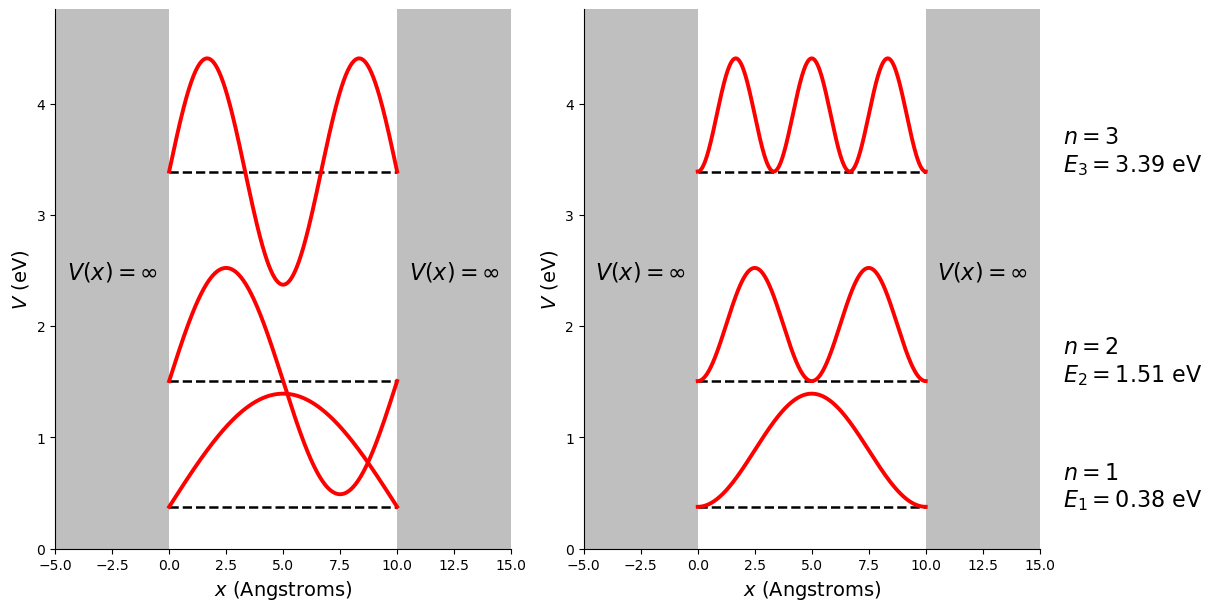

In [40]:
# Here the users inputs the value of L
L = 10 #float(input("Enter the value of L (in Angstroms) = "))
nmax = 3 #int(input("Enter the maximum value of n you want to plot = "))

# Generating the wavefunction graph
fig, ax = plt.subplots(1,2, figsize=(12,6), layout='constrained')
ax[0].spines['right'].set_color('none')
ax[0].xaxis.tick_bottom()
#ax[0].spines['left'].set_color('none')
#ax[0].axes.get_yaxis().set_visible(False)
#ax[1].spines['left'].set_position('zero')

ax[0].spines['top'].set_color('none')
X3 = np.linspace(0.0, L, 900,endpoint=True)
Emax = En(nmax,L,me)
amp = (En(2,L,me)-En(1,L,me)) *0.9
Etop = (Emax+amp)*1.1
ax[0].axis([-0.5*L,1.5*L,0.0,Etop])
ax[0].set_xlabel(r'$x$ (Angstroms)', fontsize=14)
ax[0].set_ylabel(r'$V$ (eV)', fontsize=14)

for n in range(1,nmax+1):
    ax[0].hlines(En(n,L,me), 0.0, L, linewidth=1.8, linestyle='--', color="black")
    str1="$n = "+str(n)+r"$, $E_{"+str(n)+r"} = %.3f$ eV"%(En(n,L,me))
    ax[0].plot(X3,En(n,L,me)+amp*np.sqrt(L/2.0)*psi(X3,n,L), color="red", label="", linewidth=2.8)

ax[0].margins(0.00)
boxwidth = 5
ax[0].bar(L+boxwidth/2, Etop, width=boxwidth, color='gray', alpha=0.5)
ax[0].bar(0-boxwidth/2, Etop, width=boxwidth, color='gray', alpha=0.5)
str2="$V(x) = \infty$"
ax[0].annotate('$V(x)=\infty$',xy=(-0.25*L,Etop/2), fontsize=16, ha='center')
ax[0].annotate('$V(x)=\infty$',xy=(L+0.25*L,Etop/2), fontsize=16, ha='center')

# Generating the probability density graph
ax[1].spines['right'].set_color('none')
ax[1].xaxis.tick_bottom()
#ax[1].spines['left'].set_color('none')
#ax[1].axes.get_yaxis().set_visible(False)
ax[1].spines['top'].set_color('none')
X3 = np.linspace(0.0, L, 900,endpoint=True)
Emax = En(nmax,L,me)
ax[1].axis([-0.5*L,1.5*L,0.0,Etop])
ax[1].set_xlabel(r'$x$ (Angstroms)', fontsize=14)
ax[1].set_ylabel(r'$V$ (eV)', fontsize=14)

for n in range(1,nmax+1):
    ax[1].hlines(En(n,L,me), 0.0, L, linewidth=1.8, linestyle='--', color="black")
    str1='$n='+str(n)+'$ \n$E_{'+str(n)+'}=$'+str('%3.2f' % (En(n,L,me)))+' eV'
    ax[1].text(16, En(n,L,me), str1, fontsize=16, color="black")
    ax[1].plot(X3,En(n,L,me)+ amp*(np.sqrt(L/2.0)*psi(X3,n,L))**2, color="red", label="", linewidth=2.8)
ax[1].margins(0.00)
ax[1].bar(L+boxwidth/2, Etop, width=boxwidth, color='gray', alpha=0.5)
ax[1].bar(0-boxwidth/2, Etop, width=boxwidth, color='gray', alpha=0.5)
ax[1].annotate('$V(x)=\infty$',xy=(-0.25*L,Etop/2), fontsize=16, ha='center')
ax[1].annotate('$V(x)=\infty$',xy=(L+0.25*L,Etop/2), fontsize=16, ha='center')

# Show the plots on the screen once the code reaches this point
plt.show()

```{figure} ../images/blankspaceholder.png
---
alt: A combined plot of the first three allowed energy eigen values, their wavefunctions (left plot) and their probability density function (right plot) for an electron in an infinite square well of length 10 Angstroms. The energy eigen values and principle quantum number are provided to the right of the right hand plot.
height: 5px
align: center
name: combined_plot_psi_V_pdf_V_fig
---
A combined plot which superimposes the wavefunction or the probability density function on the energy eigen state. Shown are the first three allowed energy eigen values (so that the plot doesn't become too congested with information), their wavefunctions (left plot) and their probability density function (right plot) for an electron in an infinite square well of length 10 Angstroms. The energy eigen values and principle quantum number are provided to the right of the plots. Note the vertical scale is the potential energy, the dashed lines are the energy eigen values, and the wavefunctions and probability density functions have been offset such that the dashed lines act as zero for the respective functions. 
```

## Orthogonality of eigenfunctions

We determined the that expression

$$
\psi_n(x)=\sqrt{\frac{2}{L}}\sin \left(\frac{n\pi x}{L}\right)
$$

represented the allowed states in an infinite square well with boundaries $0\le x \le L$. Whislt this looks like one equation it is infact an infinite set of equations, one for each value of $n=1, 2, 3, ... \infty$. The equations represent orthogonal states which we can show by trying to normalise the function $\psi^*_2 \psi_1$.

$$
\frac{2}{L}\int_0^L \sin \left(\frac{2\pi x}{L}\right) \sin \left(\frac{1\pi x}{L}\right)dx=0
$$(infinite_sq_well_eigenfunc_eq)

The above can be easily solved using the substitution $2\sin(A)\sin(B)=\cos(A-B)-\cos(A+B)$. More generally we would write

$$
\int_{-\infty}^{\infty} \psi^*_m \psi_n dx=0
$$(orthogonal_eq)

This is a general property so long as $m\ne n$. We call this property orthogonality (or orthonormality if the functions are normalised). You will be more familiary with this as a property of cartesian unit vectors $\hat{i}, \hat{j}, \hat{k}$ such that 

$$
\hat{i}\cdot\hat{j}=\hat{j}\cdot\hat{k}=\hat{k}\cdot\hat{i}=0
$$

this shows us that the vectors $\hat{i}, \hat{j}, \hat{k}$ are orthogonal and it is this property that allows us to represent every coordinate in a three dimentional space as a combination of these three vectors

$$
\vec{r} = x\hat{i}+y\hat{j}+z\hat{k}
$$

The same is true for the infinite square well. Any particle in the infinite square well can be expressed  as a combinations of equations {eq}`infinite_sq_well_eigenfunc_eq`. I realise this is a little abstract and you will relook at this in your next course. For now it is sufficient to understand that equation {eq}`orthogonal_eq` is a test to see if two wavefunctions are orthogonal.  

We may now write the equation for normalisation and for orthogonality as

$$
\int_{-\infty}^\infty\psi_m^*\psi_n dx=\delta_{mn} \text{ where } \delta_{mn}=\begin{cases}
    1, & \text{ if } m=n.\\
    0, & \text{ if } m\ne n.
 \end{cases}
$$

The symbol $\delta_{mn}$ is called a Kronecker delta and is a function of the variables $m$ and $n$. So for example if $m=1$ and $n=2$ then we write $\delta_{12}=0$ because $1\ne 2$. However, if $m=2$ and $n=2$ then we write $\delta_{22}=1$ because $2=2$.